In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [123]:
def feature(data):
    
    feats = {
        'zeros':float(0),
        'max':float(0),
        'min':float(0),
        'avg':float(0),
        'stdev':float(0),
        'discontiuities':float(0),
        'breaks':float(0),
        'sinusoid':float(0),
        'power':float(0)
    }

    for i in range(len(data)-1):
        if data[i]*data[i+1] <=0 and np.abs(data[i]+data[i+1]):
            feats['zeros'] += 1
    
    feats['max'] = np.max(data)
    feats['min'] = np.min(data)
    feats['avg'] = np.average(data)
    feats['stdev'] = np.std(data)
    
    return feats


In [124]:
A = np.linspace(0, 3*np.pi, num=180)
A = np.sin(A*A)


In [125]:
print(feature(A))
print(feature(np.diff(A)))
print(feature(np.diff(A, 2)))


{'zeros': 29.0, 'max': 0.9999311767235574, 'min': -0.9999712548349341, 'avg': 0.06486585660765866, 'stdev': 0.6858142548924024, 'discontiuities': 0.0, 'breaks': 0.0, 'sinusoid': 0.0, 'power': 0.0}
{'zeros': 28.0, 'max': 0.9062680358588793, 'min': -0.887361466258773, 'avg': 0.004240476094097882, 'stdev': 0.39708841900330116, 'discontiuities': 0.0, 'breaks': 0.0, 'sinusoid': 0.0, 'power': 0.0}
{'zeros': 28.0, 'max': 0.8245877609290198, 'min': -0.8174247362353593, 'avg': 0.004965064521648941, 'stdev': 0.29101141000110137, 'discontiuities': 0.0, 'breaks': 0.0, 'sinusoid': 0.0, 'power': 0.0}


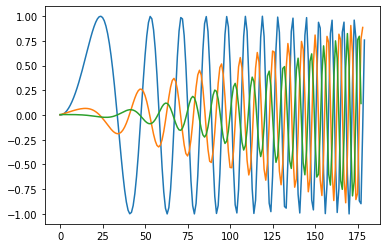

In [126]:
plt.plot(A)
plt.plot(np.diff(A))
plt.plot(np.diff(A,2))

plt.show()

In [127]:
features = []
for i in range(10000):
    A = np.linspace(0, i*np.pi, num=180)
    B = A*A
    X = feature(A)
    X['sinusoid'] = 1.
    X['power'] = 1.

    Y = feature(B)
    Y['sinusoid'] = 1.
    Y['power'] = 2.

    features.append(X)
    features.append(Y)


In [128]:
feature_data = pd.DataFrame(features)
print(feature_data.head())

   zeros       max  min       avg     stdev  discontiuities  breaks  sinusoid  \
0    0.0  0.000000  0.0  0.000000  0.000000             0.0     0.0       1.0   
1    0.0  0.000000  0.0  0.000000  0.000000             0.0     0.0       1.0   
2    1.0  3.141593  0.0  1.570796  0.911952             0.0     0.0       1.0   
3    1.0  9.869604  0.0  3.299058  2.959965             0.0     0.0       1.0   
4    1.0  6.283185  0.0  3.141593  1.823904             0.0     0.0       1.0   

   power  
0    1.0  
1    2.0  
2    1.0  
3    2.0  
4    1.0  


In [129]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing


In [130]:
x_train = feature_data['power']
y_train = feature_data['stdev']

print(x_train,y_train)

0        1.0
1        2.0
2        1.0
3        2.0
4        1.0
        ... 
19995    2.0
19996    1.0
19997    2.0
19998    1.0
19999    2.0
Name: power, Length: 20000, dtype: float64 0        0.000000e+00
1        0.000000e+00
2        9.119521e-01
3        2.959965e+00
4        1.823904e+00
             ...     
19995    2.958189e+08
19996    9.117697e+03
19997    2.958781e+08
19998    9.118609e+03
19999    2.959373e+08
Name: stdev, Length: 20000, dtype: float64


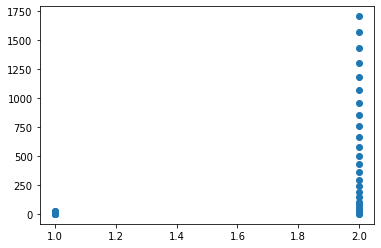

In [131]:
plt.scatter(x_train[:50],y_train[:50])
plt.show()

In [132]:
print(feature_data.dtypes)


zeros             float64
max               float64
min               float64
avg               float64
stdev             float64
discontiuities    float64
breaks            float64
sinusoid          float64
power             float64
dtype: object


In [133]:
feature_data_test = feature_data.copy()
feature_label = feature_data.pop(item="power")

normalize = preprocessing.Normalization()
normalize.adapt(feature_data)
print(feature_label)

feature_model = tf.keras.Sequential([
    layers.Dense(64),
    layers.Dense(1)
])

feature_model.compile(loss=tf.losses.MeanSquaredError(),optimizer=tf.optimizers.Adam())


0        1.0
1        2.0
2        1.0
3        2.0
4        1.0
        ... 
19995    2.0
19996    1.0
19997    2.0
19998    1.0
19999    2.0
Name: power, Length: 20000, dtype: float64


In [134]:
feature_model.fit(feature_data_test, feature_label, epochs=20)


Epoch 1/20
625/625 [==============================] - 1s 584us/step - loss: 380679460225024.0000
Epoch 2/20
625/625 [==============================] - 0s 554us/step - loss: 209222.6875
Epoch 3/20
625/625 [==============================] - 0s 562us/step - loss: 209219.4062
Epoch 4/20
625/625 [==============================] - 0s 560us/step - loss: 209217.9219
Epoch 5/20
625/625 [==============================] - 0s 549us/step - loss: 209217.2344
Epoch 6/20
625/625 [==============================] - 0s 576us/step - loss: 209214.8750
Epoch 7/20
625/625 [==============================] - 0s 548us/step - loss: 209212.0781
Epoch 8/20
625/625 [==============================] - 0s 631us/step - loss: 209210.1719
Epoch 9/20
625/625 [==============================] - 0s 690us/step - loss: 209204.9219
Epoch 10/20
625/625 [==============================] - 0s 606us/step - loss: 209198.4688
Epoch 11/20
625/625 [==============================] - 0s 691us/step - loss: 209192.3750
Epoch 12/20
625/625 [

In [139]:
print(feature_model.loss)